## 1.2

数据预处理

```python
# 将xlsx转为csv
import pandas as pd

in_filepath = './data/附件1 土壤地质调查_采样点位置和相关信息.xlsx'
out_filepath = './data/1.2.csv'

data = pd.read_excel(in_filepath)
data.to_csv(out_filepath, index=False)

data = pd.read_csv(out_filepath)
print(data.head()) # 看看数据长什么样
```
```

导包

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

读数据

In [84]:
filepath = 'data/1.2.csv'
df = pd.read_csv(filepath, sep=',')
print(df.head())

x = df['x(m)'].values
y = df['y(m)'].values
elevation = df['海拔(m)'].values
as_concentration = df['As的浓度 (μg/g)'].values

   编号  x(m)  y(m)  海拔(m)  As的浓度 (μg/g)
0   1    74   781      5          7.84
1   2  1373   731     11          5.93
2   3  1321  1791     28          4.90
3   4     0  1787      4          6.56
4   5  1049  2127     12          6.35


预处理

In [85]:
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
xi, yi = np.meshgrid(xi, yi)

插值

In [86]:
# 地形插值
zi_elev = griddata((x, y), elevation, (xi, yi), method='linear', fill_value=elevation.mean()) # 线性插值
# As浓度插值
zi_as = griddata((x, y), as_concentration, (xi, yi), method='linear', fill_value=as_concentration.mean())

# # 地形插值
# zi_elev = griddata((x, y), elevation, (xi, yi), method='nearest', fill_value=elevation.mean()) # 最近邻插值
# # As浓度插值
# zi_as = griddata((x, y), as_concentration, (xi, yi), method='nearest', fill_value=as_concentration.mean())

# # 地形插值
# zi_elev = griddata((x, y), elevation, (xi, yi), method='cubic', fill_value=elevation.mean()) # 三次插值
# # As浓度插值
# zi_as = griddata((x, y), as_concentration, (xi, yi), method='cubic', fill_value=as_concentration.mean())

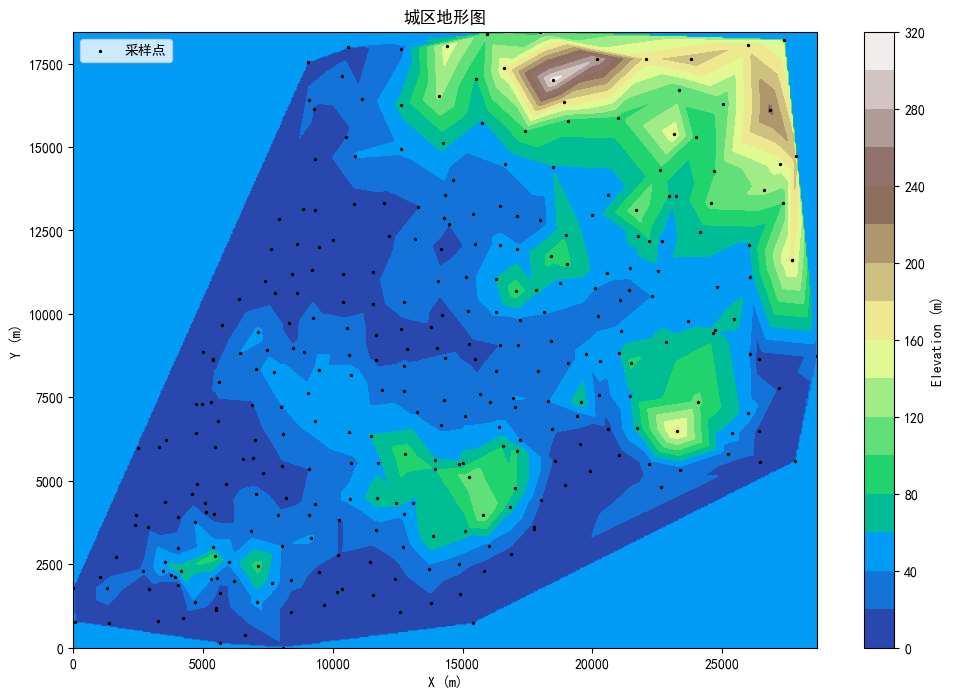

In [87]:
plt.figure(figsize=(12, 8))
contour = plt.contourf(xi, yi, zi_elev, levels=15, cmap='terrain')
plt.colorbar(contour, label='Elevation (m)')
plt.scatter(x, y, c='black', s=2, label='采样点')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('城区地形图')
plt.legend()
plt.show()

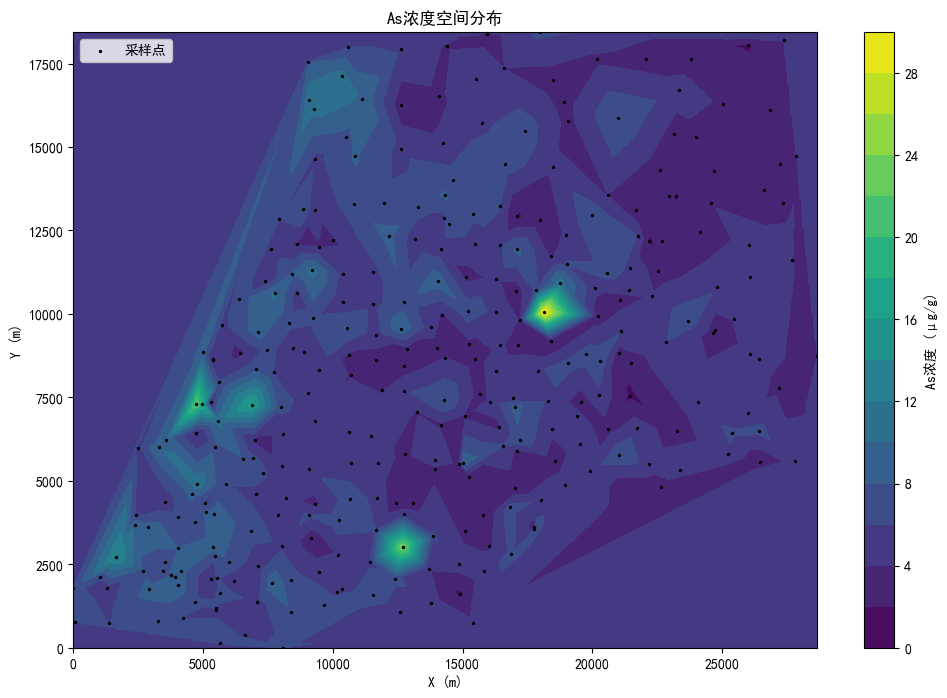

In [88]:
plt.figure(figsize=(12, 8))
contour_as = plt.contourf(xi, yi, zi_as, levels=15, cmap='viridis')
plt.colorbar(contour_as, label='As浓度 (μg/g)')
plt.scatter(x, y, c='black', s=2, label='采样点')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('As浓度空间分布')
plt.legend()
plt.show()

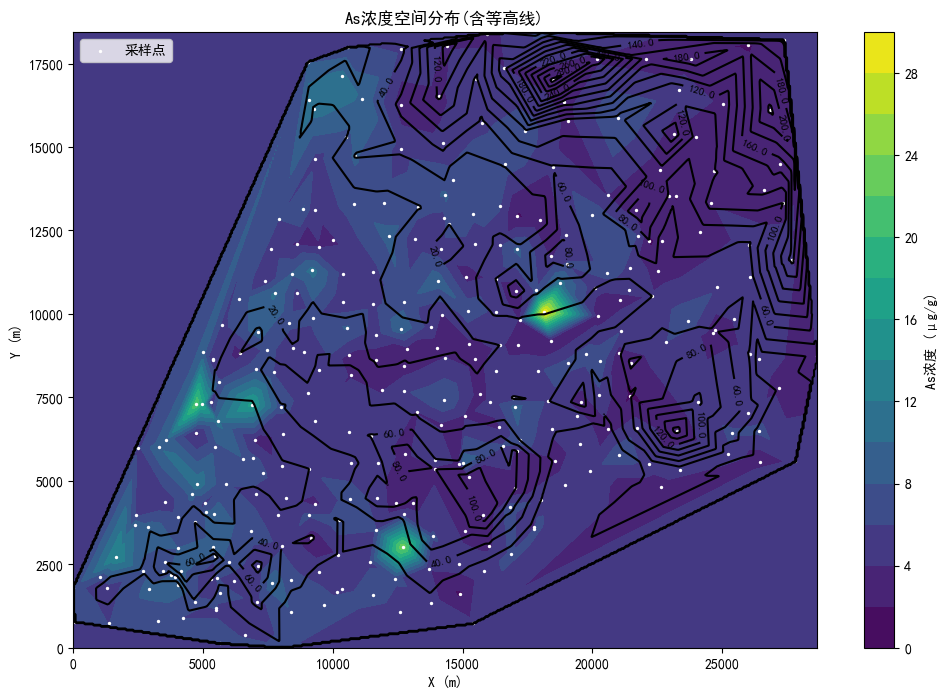

线性	As浓度最小值: 1.631	 As浓度最大值: 29.842
实际	As浓度最小值: 1.610	 As浓度最大值: 30.130


In [93]:
plt.figure(figsize=(12, 8))
contour_as = plt.contourf(xi, yi, zi_as, levels=15, cmap='viridis')
plt.colorbar(contour_as, label='As浓度 (μg/g)')
plt.scatter(x, y, c='white', s=2, label='采样点')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('As浓度空间分布(含等高线)')

contour_elev = plt.contour(xi, yi, zi_elev, levels=15, colors='black') # 加上等高线
plt.clabel(contour_elev, inline=True, fontsize=8, fmt='%1.1f') # 添加海拔标识  

plt.legend()
plt.show()

print(f"\033[1;34m线性\033[0m\tAs浓度最小值: {np.min(zi_as):.3f}\t As浓度最大值: {np.max(zi_as):.3f}")
print(f"\033[1;34m实际\033[0m\tAs浓度最小值: {np.min(as_concentration):.3f}\t As浓度最大值: {np.max(as_concentration):.3f}")

In [94]:
correlation = np.corrcoef(elevation, as_concentration)[0, 1]
print(f"海拔与As浓度的相关系数: {correlation:.3f}")

海拔与As浓度的相关系数: -0.289
